In [7]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
import json
dummy_fits = Polyfit('dummy_data/fits.npz', input_h5='dummy_data/inputdata.h5', order=3, covariance = True)
dummy_tune = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance = False)
dummy_tune_cov = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance = True)


Calculated inital guess:  [ 1.44290955 -0.97476325]                           
Tuned Parameters:  [ 1.48643294 -0.99134114] , Objective =  541.727826608064 , chi2/ndf =  15.477937903087543
Covariance of Tuned Parameters:  [[8.47466639e-05 1.33087882e-05]
 [1.33087882e-05 3.84899589e-05]]
Calculated inital guess:  [ 1.45646352 -1.01812564]
Tuned Parameters:  [ 1.48481798 -0.99638245] , Objective =  81.48512244776077 , chi2/ndf =  2.3281463556503077
Covariance of Tuned Parameters:  [[8.99987272e-05 1.52852044e-05]
 [1.52852044e-05 4.35373965e-05]]


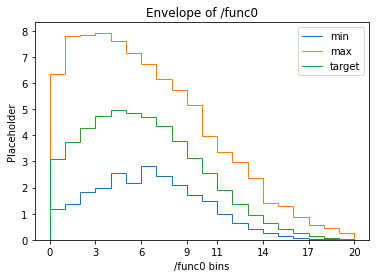

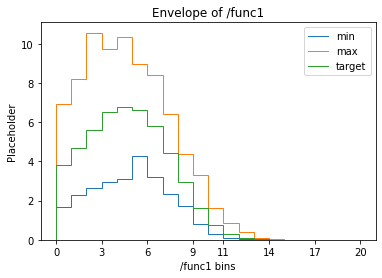

In [8]:
dummy_tune_cov.graph_envelope_target()

Tuning with 100 samples of size 30 out of 42
Sample 0 Tuned: [ 1.49422518 -0.98502447] , chi2/ndf: 18.2326734120172        
Sample 1 Tuned: [ 1.49023274 -0.98723444] , chi2/ndf: 18.995349914343116      
Sample 2 Tuned: [ 1.49173423 -0.98670503] , chi2/ndf: 18.34505240684732       
Sample 3 Tuned: [ 1.48490593 -0.99440003] , chi2/ndf: 16.789906299127466      
Sample 4 Tuned: [ 1.49327855 -0.99362235] , chi2/ndf: 11.79049156315979       
Sample 5 Tuned: [ 1.49414213 -0.99023976] , chi2/ndf: 17.298785582529124      
Sample 6 Tuned: [ 1.50088633 -1.00346666] , chi2/ndf: 20.423124474345496      
Sample 7 Tuned: [ 1.4828836  -0.99477558] , chi2/ndf: 17.826894080640805      
Sample 8 Tuned: [ 1.4780852  -0.99140141] , chi2/ndf: 16.47123671357052       
Sample 9 Tuned: [ 1.47602326 -0.99183198] , chi2/ndf: 17.63519496971291       
Sample 10 Tuned: [ 1.46743137 -0.99484671] , chi2/ndf: 17.712857359744927     
Sample 11 Tuned: [ 1.49277992 -0.99074824] , chi2/ndf: 17.050527879804395     
Sample 

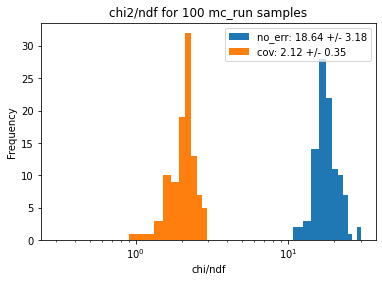

In [3]:
import matplotlib.pyplot as plt
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
dummy_tune.graph_chi2_sample('dummy_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[0], save_file = 'dummy_data/chi2results_no_err.json')
dummy_tune_cov.graph_chi2_sample('dummy_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[1], save_file = 'dummy_data/chi2results_cov.json', new_figure = False,
 save_figure = "dummy_data/chi2_graph.pdf")

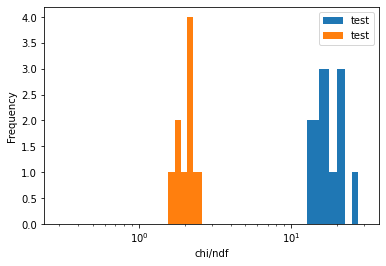

In [4]:
plt.figure()
plt.ylabel("Frequency")
plt.xlabel("chi/ndf")
plt.xscale('log')

graph_range = [0.3, 30]
num_bins = 50
chi2ndf = [21.1,17.3,16.9,22.5,16.1,26.7,14.9,13.3,20.7,19.9]
plt.hist(chi2ndf, bins = 'doane', label = "test",  range = graph_range, facecolor = cycle_colors[0])
chi2ndf = [2.07,1.58,1.79,2.18,1.88,2.09,2.48,2.24,2.34,2.09]
plt.hist(chi2ndf, bins = 'doane', label = "test", range = graph_range, facecolor = cycle_colors[1])
plt.legend()


In [5]:
import json
results = {}
results['chi2ndf'] = chi2ndf
results['p_opt'] = [1, 2]
json_results = json.dumps(results)
json_results

'{"chi2ndf": [2.07, 1.58, 1.79, 2.18, 1.88, 2.09, 2.48, 2.24, 2.34, 2.09], "p_opt": [1, 2]}'

'\n1x\n [[8.29169943e-05 1.40898690e-05]\n [1.40898690e-05 4.01315296e-05]]\n200x\n [[8.34164622e-05 1.41109028e-05]\n [1.41109028e-05 4.01234762e-05]]\n1000x\n [[8.35000702e-05 1.41587722e-05]\n [1.41587722e-05 4.02531556e-05]]\n\n'

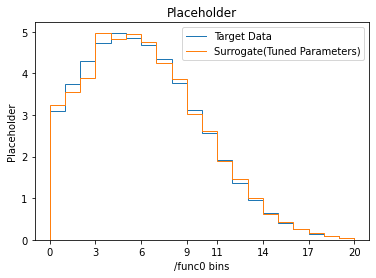

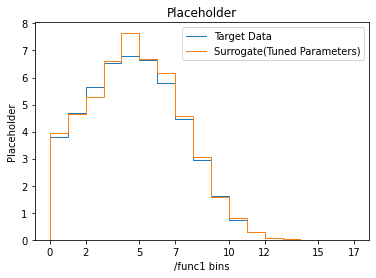

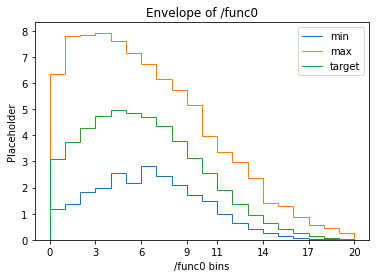

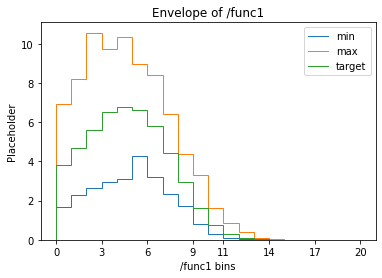

In [6]:
dummy_tune.graph_tune('/func0')
dummy_tune.graph_tune('/func1')
dummy_tune.graph_envelope_target()
"""
1x
 [[8.29169943e-05 1.40898690e-05]
 [1.40898690e-05 4.01315296e-05]]
200x
 [[8.34164622e-05 1.41109028e-05]
 [1.41109028e-05 4.01234762e-05]]
1000x
 [[8.35000702e-05 1.41587722e-05]
 [1.41587722e-05 4.02531556e-05]]

"""